In [112]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
# Added new library Mlxtend for advance visualization tools
from mlxtend.plotting import plot_decision_regions

In [114]:
# Importing the dataset
# I dropped the extra columns and chose only petal length for simplicity 
df = pd.read_csv('Iris.csv',usecols=[ 'SepalLengthCm', 'PetalLengthCm', 'Species'])

In [115]:
df

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
145,6.7,5.2,Iris-virginica
146,6.3,5.0,Iris-virginica
147,6.5,5.2,Iris-virginica
148,6.2,5.4,Iris-virginica


In [116]:
# Now applying LabelEncdoer for the label column 
# Instantiate the model
lbl = LabelEncoder()
# Fit_transforming the dataframe
df['Species'] = lbl.fit_transform(df['Species'])


In [117]:
df # As we can see the changes are reflected 

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [118]:
# Segregating the data into Input and output columns
X = df.drop(columns=['Species'])
y = df['Species']

In [119]:
X # Verifying the features

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [120]:
y # Verifying the label set

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [121]:
# Now splitting the data into training and testing set
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , random_state = 42)

In [122]:
# Now using the Logistic Regression with Multinomial classes Selected for Softmax Regression
# In Previous versions we need a multiclass argument to be passed as multinomial but that is depricated and now every solver supports it by default.
lor = LogisticRegression()

In [123]:
lor.fit(X_train,y_train) # Fit the model

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [124]:
y_pred_lor = lor.predict(X_test) # Make predictions and store it in a variable

In [125]:
accuracy_score(y_test,y_pred_lor) # The accuracy is fishy.

1.0

In [126]:
precision_score(y_test,y_pred_lor,average=None) # Exceptional behaviour

array([1., 1., 1.])

In [127]:
pd.DataFrame(confusion_matrix(y_test,y_pred_lor)) # Fantastic !!!

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


In [128]:
# Predict on random data 
query = np.array([[3.4,2.7]])
lor.predict_proba(query)

c:\Users\hp\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.09965681e-01, 1.89436112e-01, 5.98206953e-04]])

c:\Users\hp\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


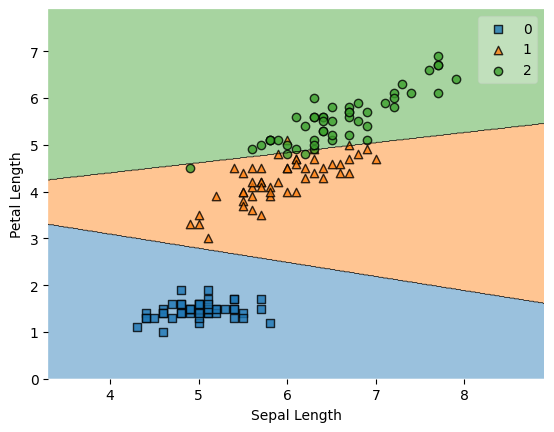

In [130]:
# Now we will use mlxtend to plot this 
plot_decision_regions(X.values,y.values,lor)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

In [ ]:
# For more columns we can either use PCA or fill_feature_values .